In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('seaborn-v0_8-whitegrid')

import warnings
warnings.filterwarnings("ignore")

# Read Datasets

In [40]:
path = r'C:\Users\rifky\Downloads\Rakamin Project-Based Virtual Internship\Home Credit Indonesia (Data Science)\Final Project\dataset'

app_train = pd.read_csv(os.path.join(path, 'application_train.csv'))

train_eda = app_train.copy()

In [41]:
print('Train data shape:  ', train_eda.shape)
train_eda.head()

Train data shape:   (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Exploratory Data Analysis (EDA)

## Examine the distribution of the Target Column
Karena fitur/variabel/kolom target adalah variabel yang ingin kita prediksi (0: Dibayar tepat waktu, 1: Kesulitan Membayar)

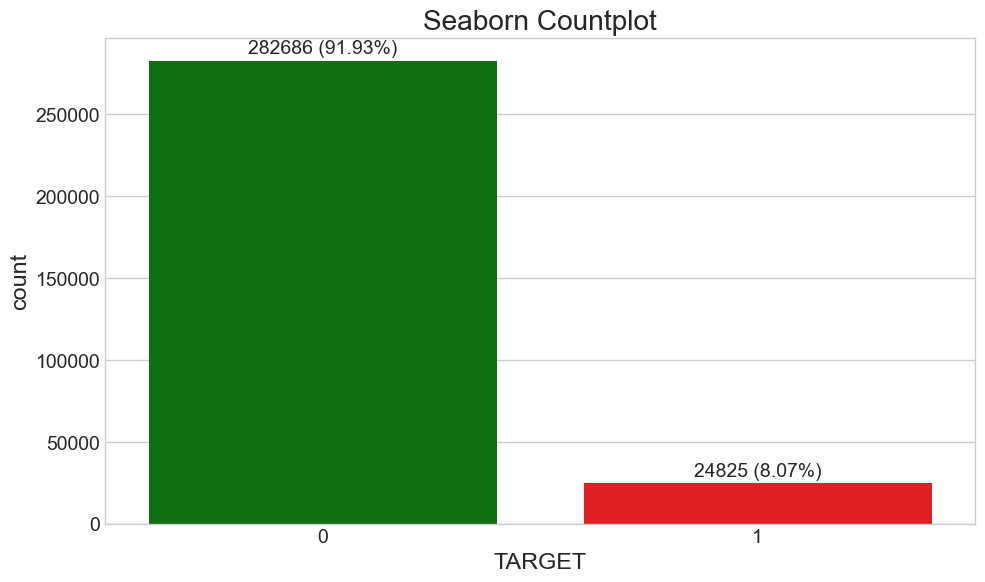

In [81]:
plt.figure(figsize=(10, 6))
plt.tight_layout()

ax = sns.countplot(x=train_eda['TARGET'], palette=['green', 'red'])

for bar in ax.patches:
    count = int(bar.get_height())
    percentage = (int(bar.get_height()) / len(train_eda['TARGET'])) * 100
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 2000,
            f'{count} ({round(percentage, 2)}%)',
            ha='center', va='bottom')

plt.title("Seaborn Countplot")
plt.legend('')
plt.show()

## Column Types

In [39]:
train_eda.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

## Check Duplicated Values

In [100]:
print('The number of duplication in Train data is:', train_eda.duplicated().sum())
print('The number of duplication in Test data is:', test.duplicated().sum())

The number of duplication in Train data is: 0
The number of duplication in Test data is: 0


## Examine Missing Values

In [101]:
def check_missing_values(df):
    mv_count = df.isna().sum()
    mv_percentage = ((mv_count / len(df)) * 100).round(1).astype(str) + "%"
    df_mv = pd.concat([mv_count, mv_percentage], axis=1)

    # rename columns
    df_mv = df_mv.rename(columns={0: "Missing Value Count", 1: "Percentage of Missing Value by Total"})
    
    df_mv = df_mv.sort_values("Percentage of Missing Value by Total", ascending=False)
    
    return df_mv

missing_values = check_missing_values(train_eda)
missing_values.head(20)

,Missing Value Count,Percentage of Missing Value by Total
COMMONAREA_MEDI,214865,69.9%
COMMONAREA_AVG,214865,69.9%
COMMONAREA_MODE,214865,69.9%
NONLIVINGAPARTMENTS_MODE,213514,69.4%
NONLIVINGAPARTMENTS_AVG,213514,69.4%
NONLIVINGAPARTMENTS_MEDI,213514,69.4%
LIVINGAPARTMENTS_MODE,210199,68.4%
LIVINGAPARTMENTS_AVG,210199,68.4%
FONDKAPREMONT_MODE,210295,68.4%
LIVINGAPARTMENTS_MEDI,210199,68.4%


Ubah value negatif yang terdapat pada kolom DAYS menjadi positif

In [42]:
days_col = [col for col in train_eda if 'DAYS' in col]
train_eda[days_col] = train_eda[days_col].abs()

In [89]:
pd.set_option('display.max_columns', None)
train_eda.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97775

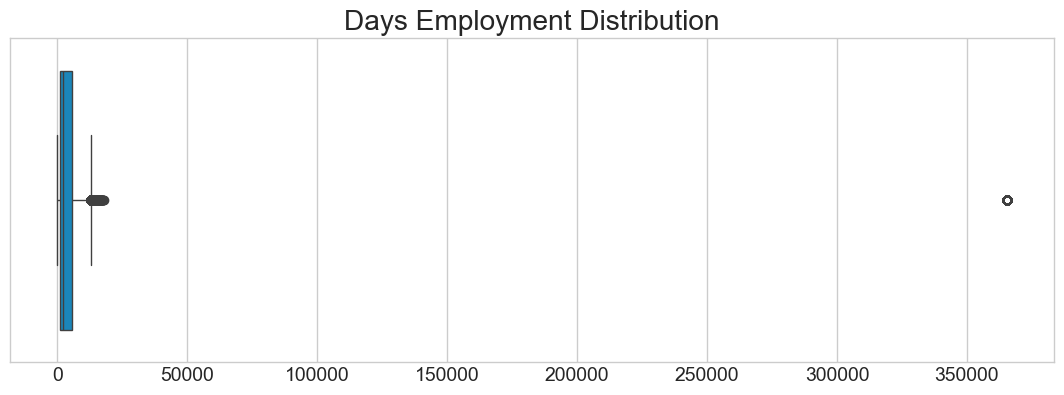

In [99]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=train_eda, x='DAYS_EMPLOYED')
plt.title('Days Employment Distribution')
plt.xlabel('')
plt.show()

In [107]:
non_anom = train_eda[train_eda['DAYS_EMPLOYED'] != 365243]
anom = train_eda[train_eda['DAYS_EMPLOYED'] == 365243]

print('The non-anomalies default on %0.2f%% of loans' % (non_anom['TARGET'].mean() * 100))
print('The anomalies default on %0.2f%% of loans' % (anom['TARGET'].mean() * 100))
print(f'There are %d anomalous days of employment from {len(train_eda)} total of days' % len(anom)) # berapa baris yang memiliki 365243 DAYS_EMPLOYED

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment from 307511 total of days


--> Ternyata anom memiliki rasio gagal bayar lebih rendah dari non_anom, berarti:
- Nilai ini bukan cuma placeholder biasa
- Bisa berisi informasi penting tentang pelanggan (misal: pengangguran --> risiko gagal bayar berbeda)

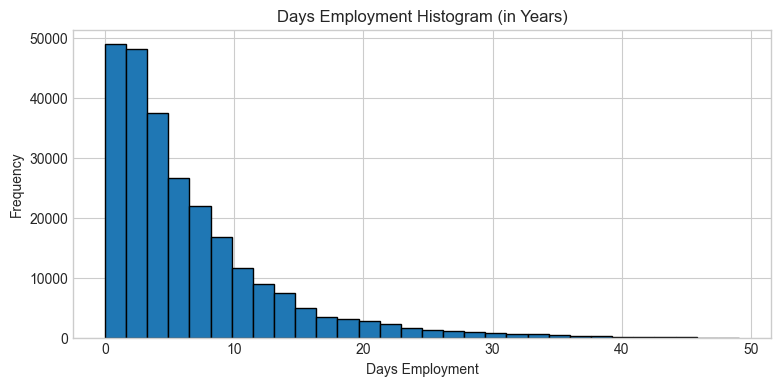

In [5]:
# Membuat fitur baru bertipe boolean (1: anomali)
train_eda['DAYS_EMPLOYED_ANOM'] = train_eda['DAYS_EMPLOYED'] == 365243

# Replace nilai anomali (365243) di fitur 'DAYS_EMPLOYED' menjadi NaN
train_eda['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

plt.figure(figsize=(9,4))
plt.hist(train_eda['DAYS_EMPLOYED'] / 365, bins=30, edgecolor='black')
plt.title('Days Employment Histogram (in Years)')
plt.xlabel('Days Employment')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Lakukan hal yang sama pada data test
test['DAYS_EMPLOYED_ANOM'] = test["DAYS_EMPLOYED"] == 365243
test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

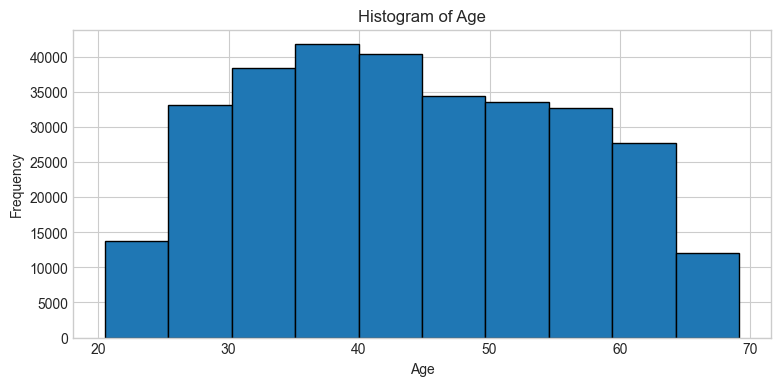

In [9]:
plt.figure(figsize=(9, 4))
plt.hist(x = train_eda['DAYS_BIRTH'] / 365, edgecolor='k', bins=10)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

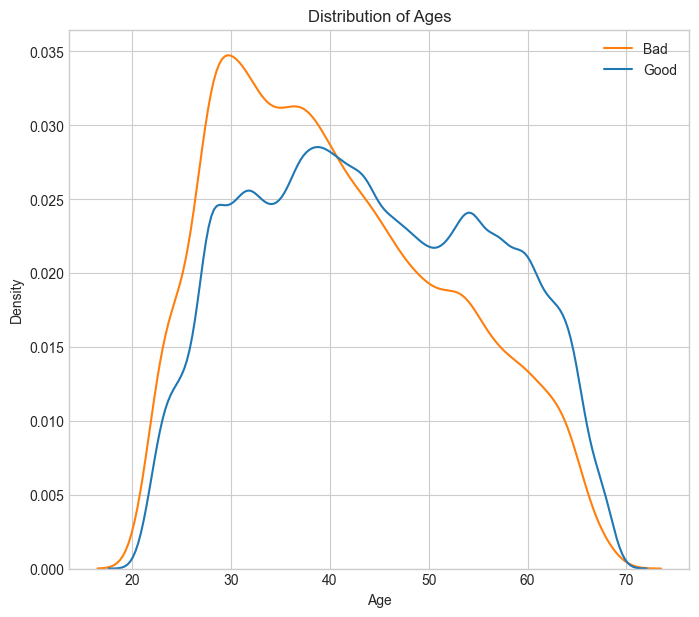

In [8]:
plt.figure(figsize=(8, 7))
sns.kdeplot(data=train_eda, x=train_eda['DAYS_BIRTH'] / 365, hue='TARGET', common_norm=False)

plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.legend(['Bad', 'Good'])
plt.show()

In [10]:
age_data = train_eda[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = (age_data['DAYS_BIRTH'] / 365).round(1)

# bin the age_data into 5 years each
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))

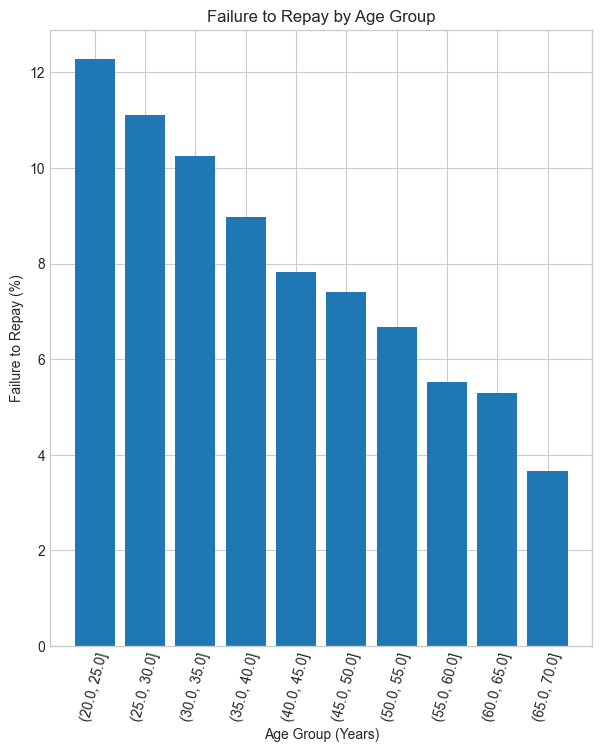

In [13]:
age_groups = age_data.groupby('YEARS_BINNED').mean()

plt.figure(figsize=(7,8))

plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])
plt.xticks(rotation = 75)
plt.xlabel('Age Group (Years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')

plt.show()

Polanya terlihat disini, pelanggan yang lebih muda lebih mungkin gagal membayar kredit. Tiga group termuda memiliki persentase di atas 10%.
Informasi ini bisa digunakan oleh Home Credit; karena pelanggan yang lebih muda yang lebih mungkin gagal membayar, mungkin mereka bisa lebih diberikan arahan atau bimbingan mengenai perencanaan finansial.

### Exterior Sources

--> Skor penilaian risiko kegagalan membayar dari lembaga eksternal, dipakai untuk bantu menilai apakah seseorang aman atau berisiko untuk diberi pinjaman. 
Skor dimulai dari 0 sampai 1:
Semakin mendekati 0 artinya semakin berisiko gagal bayar, semakin mendekati 1 artinya semakin aman atau rendah risiko

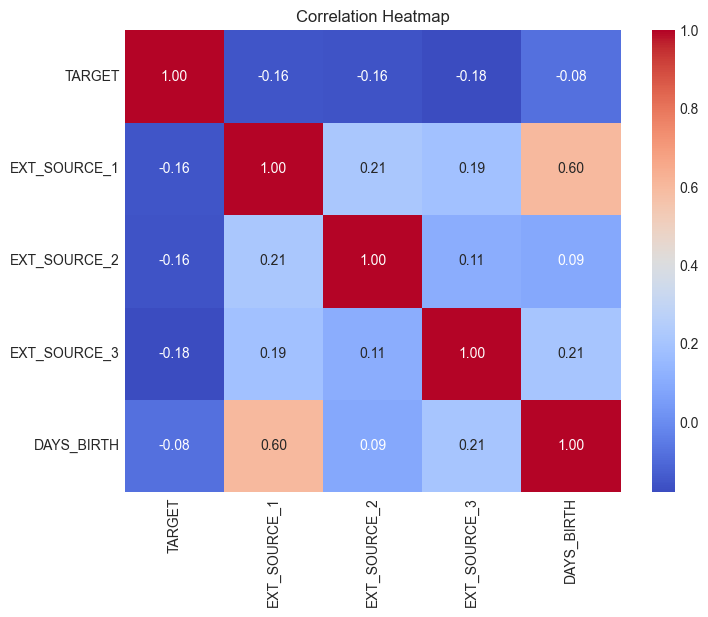

In [31]:
ext_data = train_eda[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corr = ext_data.corr()

plt.figure(figsize=(8, 6))

sns.heatmap(ext_data_corr, fmt = '.2f', cmap = 'coolwarm', annot = True, annot_kws = {'size': 10})
plt.title('Correlation Heatmap')
plt.show()

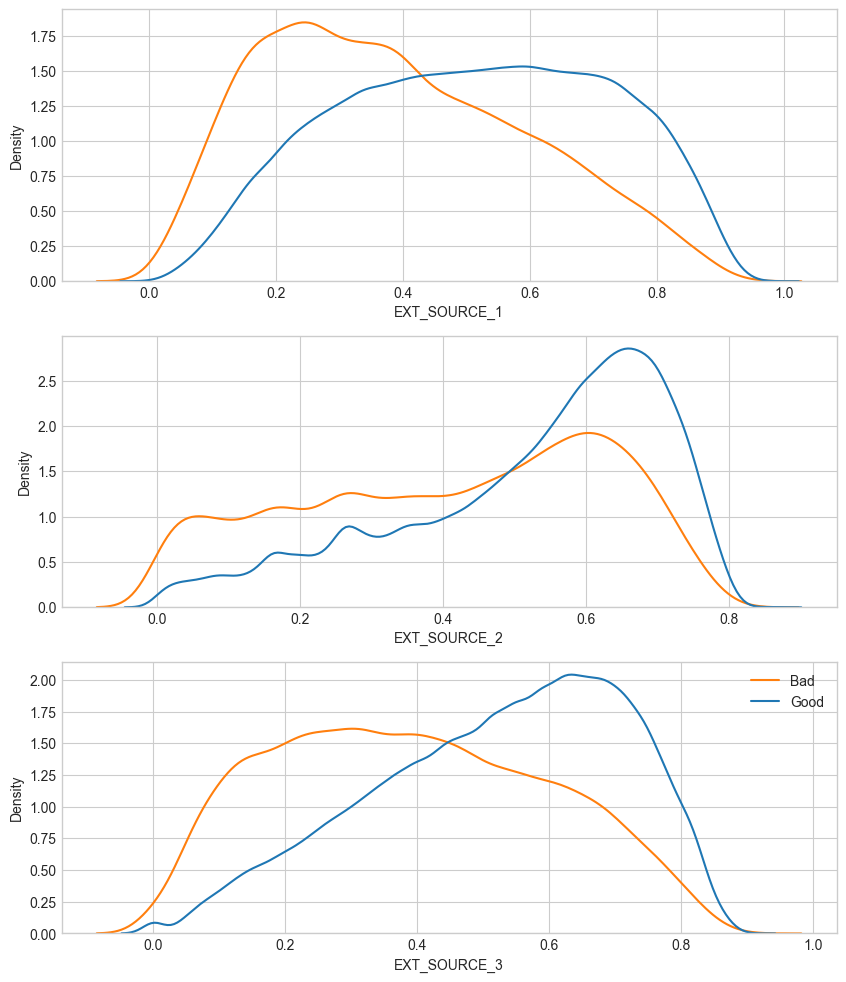

In [43]:
plt.figure(figsize = (10, 12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(3, 1, i+1)
    sns.kdeplot(data=train_eda, x=source, hue='TARGET', common_norm=False, legend=False)
    
plt.legend(['Bad', 'Good'])
plt.show()

## Feature Engineering

Kita bisa membuat beberapa fitur yang mencoba menangkap hal-hal yang menurut kita penting untuk menentukan apakah klien akan gagal bayar pinjaman. Di sini saya akan menggunakan empat fitur yang terinspirasi oleh skrip Aguiar:

- CREDIT_INCOME_PERCENT: persentase total kredit relatif terhadap pendapatan klien 
- ANNUITY_INCOME_PERCENT: Persentase cicilan bulanan (annuity) terhadap pendapatan klien
- CREDIT_TERM: Lama periode cicilan dalam bulan
- DAYS_EMPLOYED_PERCENT: Persentase lama bekerja dibandingkan umur klien (dalam hari)

In [156]:
train_eda_newfeats = train_eda.copy()
test_newfeats = test.copy()

train_eda_newfeats['CREDIT_INCOME_PERCENT'] = train_eda_newfeats['AMT_CREDIT'] / train_eda_newfeats['AMT_INCOME_TOTAL']
train_eda_newfeats['ANNUITY_INCOME_PERCENT'] = train_eda_newfeats['AMT_ANNUITY'] / train_eda_newfeats['AMT_INCOME_TOTAL']
train_eda_newfeats['CREDIT_TERM'] = train_eda_newfeats['AMT_ANNUITY'] / train_eda_newfeats['AMT_CREDIT']
train_eda_newfeats['DAYS_EMPLOYED_PERCENT'] = train_eda_newfeats['DAYS_EMPLOYED'] / train_eda_newfeats['DAYS_BIRTH']

In [157]:
test_newfeats['CREDIT_INCOME_PERCENT'] = test_newfeats['AMT_CREDIT'] / test_newfeats['AMT_INCOME_TOTAL']
test_newfeats['ANNUITY_INCOME_PERCENT'] = test_newfeats['AMT_ANNUITY'] / test_newfeats['AMT_INCOME_TOTAL']
test_newfeats['CREDIT_TERM'] = test_newfeats['AMT_ANNUITY'] / test_newfeats['AMT_CREDIT']
test_newfeats['DAYS_EMPLOYED_PERCENT'] = test_newfeats['DAYS_EMPLOYED'] / test_newfeats['DAYS_BIRTH']

### Visualize the new features

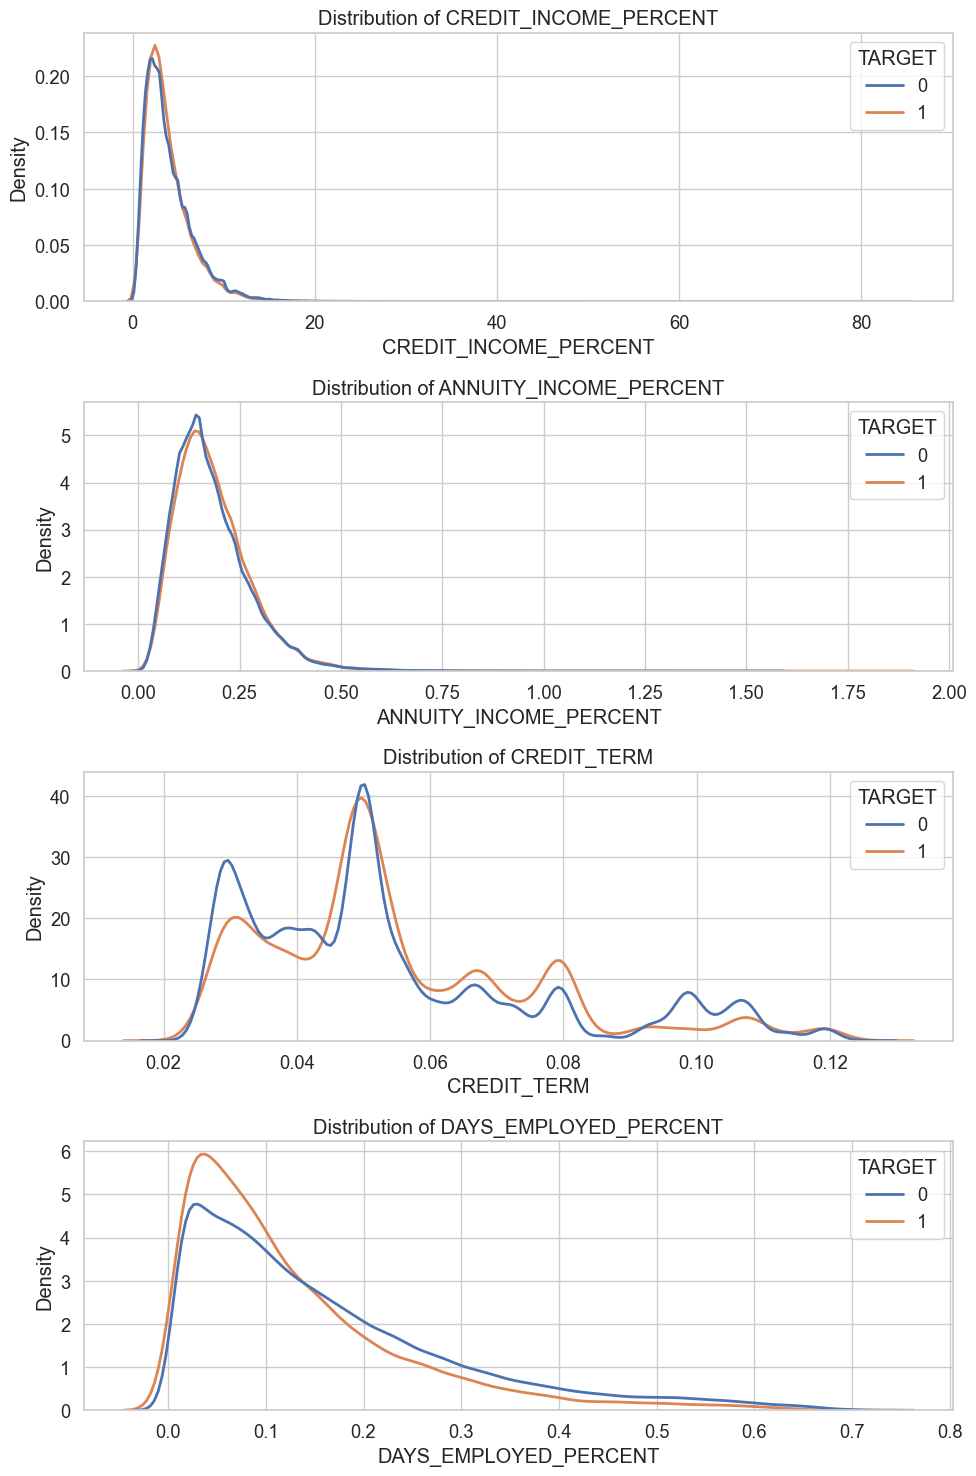

In [158]:
plt.figure(figsize=(10, 15))

for i, col in enumerate(train_eda_newfeats.iloc[:, -4:]):
    plt.subplot(4, 1, i+1)
    sns.kdeplot(data=train_eda_newfeats, x=col, hue='TARGET', common_norm=False, linewidth=2)

    plt.title(f'Distribution of {col}')

plt.tight_layout()